In [2]:
import tensorflow as tf
from tensorflow import keras as keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def show_image (data):
    plt.figure()
    plt.imshow(data)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
print(test_labels)

[9 2 1 ... 8 1 5]


In [10]:
train_images[0,23,23]

194

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

T-shirt/top


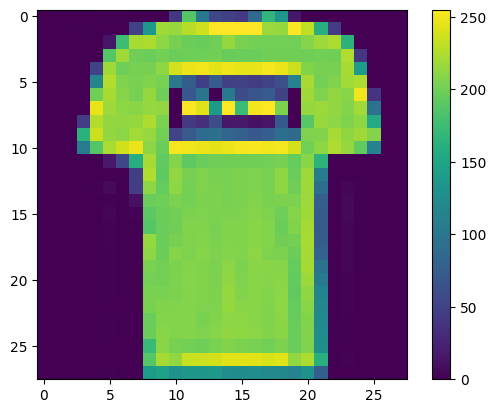

In [12]:
print(class_names[train_labels[1]])
show_image(train_images[1])

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

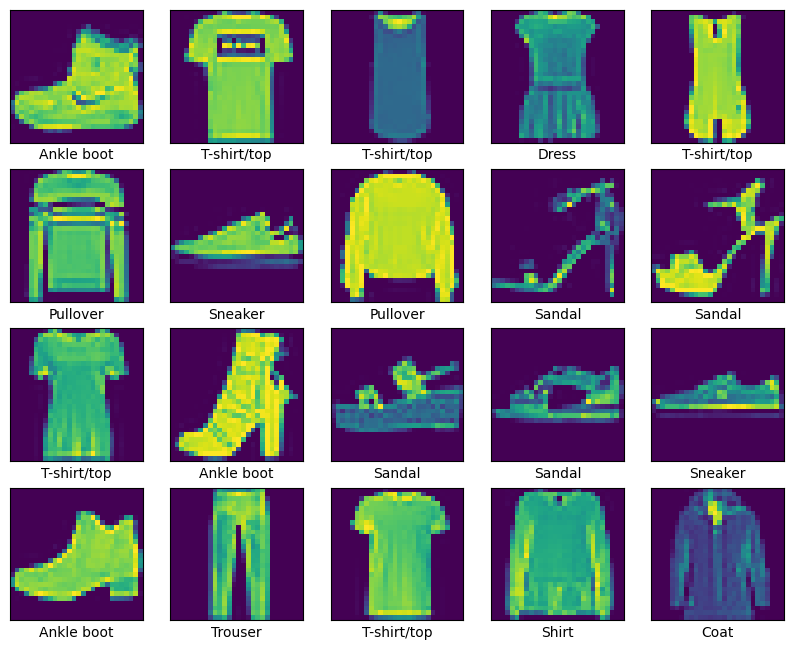

In [31]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

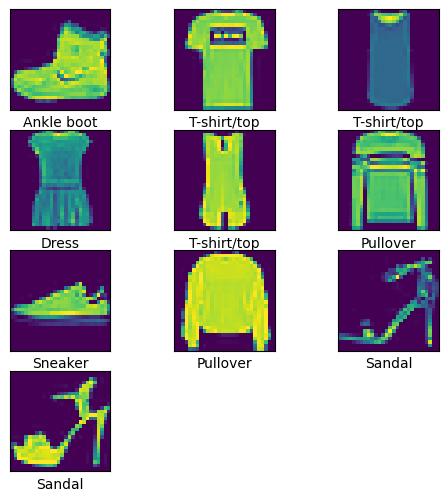

In [41]:
count =0
index = 0
plt.figure(figsize=(6,6))
for label in train_labels:
        if label == count:
                plt.subplot(4,3,count+1)
                plt.xticks([])                
                plt.yticks([])
                plt.grid(False)
                plt.imshow(train_images[label])
                plt.xlabel(class_names[train_labels[label]])
                count+=1
        index+=1
        if count >12:
                break
plt.show()        

In [16]:
train_images = train_images/255.0
test_images = test_images/255.0

## Building Model ##

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')]
)

## Compiling Model

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training Model

In [19]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5040 - accuracy: 0.8232
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3771 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3394 - accuracy: 0.8751
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3155 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2974 - accuracy: 0.8897
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2802 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2702 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2580 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2475 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.241

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy is: ',test_acc)

313/313 [==============================] - 0s 932us/step - loss: 0.3479 - accuracy: 0.8765
Test accuracy is:  0.8765000104904175


In [21]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 849us/step


In [22]:
class_names[np.argmax(predictions[8888])]

'Bag'

In [23]:
data_number = input('Enter index no of test data')
if isinstance(data_number,int):
    if data_number >= 0 and data_number <= test_images.shape[0]:
        num= np.argmax(predictions[int(data_number)])
        predicted = class_names[num]
        real = class_names[test_labels[data_number]]
        print('The image is of ', real,'\n The prediction is', predicted,'\n')
        show_image(test_images[data_number])
else:
    print('invalid input, number must be an integer between 0 and ', test_images.shape[0])

invalid input, number must be an integer between 0 and  10000
